## Data

A time series is available with the monthly expenditure (millions of dollars) on corticosteroid drugs that the Australian health system had between 1991 and 2008. It is intended to create an autoregressive model capable of predicting future monthly expenditures.

In [1]:
pip install skforecast

  Obtaining dependency information for skforecast from https://files.pythonhosted.org/packages/d8/b7/ee8344aa230a60b766d6dc8afa16535af4daf197d6e4912951d34fc2116e/skforecast-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for optuna>=2.10 from https://files.pythonhosted.org/packages/4e/41/2a2f5ed6c997367ab7055185cf66d536c228b15a12b8e112a274808f48b5/optuna-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/c2/12/58f4f11385fddafef5d6f7bfaaf2f42899c8da6b4f95c04b7c3b744851a8/alembic-1.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=1.3.0 from https://files.pythonhosted.org/packages/b4/5f/95e0ed74093ac3c0db6acfa944d4d8ac6284ef5e1136b878a327ea1f975a/SQLAlchemy-2.0

In [2]:
from skforecast.datasets import fetch_dataset

# Data download
# ==============================================================================
data = fetch_dataset(name='h2o_exog', raw=True, verbose=False)
data = data.rename(columns={'fecha': 'date'})
data.to_csv('dataset.csv', sep=',', index=False, header=True)

The column `date` has been stored as a `string`. To convert it to `datetime` the `pd.to_datetime()` function can be use. Once in `datetime` format, and to make use of Pandas functionalities, it is set as an index. Also, since the data is monthly, the frequency is set as Monthly Started 'MS'.

It is possible to have information about other variables, whose future **value is known**, so could serve as additional predictors in the model.

A new variable is simulated whose behavior is correlated with the modeled time series and which is to be included as a predictor.

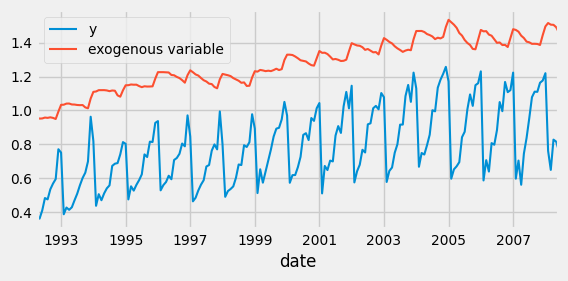

In [10]:
# Plots
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Data preparation
# ==============================================================================
data = data.rename(columns={'fecha': 'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('MS')
data = data.sort_index()

fig, ax = plt.subplots(figsize=(6, 2.7))
data['y'].plot(ax=ax, label='y')
data['exog_1'].plot(ax=ax, label='exogenous variable')
ax.legend(loc='upper left');

In [11]:
data.head()

,y,exog_1,exog_2
date,,,
1992-04-01,0.379808,0.958792,1.166029
1992-05-01,0.361801,0.951993,1.117859
1992-06-01,0.410534,0.952955,1.067942
1992-07-01,0.483389,0.958078,1.097376
1992-08-01,0.475463,0.956370,1.122199


When using the `asfreq()` method in Pandas, any gaps in the time series will be filled with `NaN` values to match the specified frequency. Therefore, it is essential to check for any missing values that may occur after this transformation.

In [12]:
# Missing values
# ==============================================================================
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


Although it is unnecessary, since a frequency has been established, it is possible to verify that the time series is complete.

In [13]:
# Verify that a temporary index is complete
# ==============================================================================
start_date = data.index.min()
end_date = data.index.max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq=data.index.freq)
is_index_complete = (data.index == complete_date_range).all()
print(f"Index complete: {is_index_complete}")

Index complete: True
